<a href="https://colab.research.google.com/github/kalyaannnn/NLPReference/blob/main/WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import re
import nltk
from gensim.utils import simple_preprocess

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


path = '/content/drive/MyDrive/Colab Notebooks/train.csv'
df = pd.read_csv(path)[['Body', 'Y']].rename(columns = {'Body': 'question', 'Y': 'category'})
df.head()

path1 = '/content/drive/MyDrive/Colab Notebooks/valid.csv'
dataset = pd.read_csv(path1)[['Body', 'Y']].rename(columns = {'Body': 'question', 'Y': 'category'})

In [7]:
symbols = re.compile(pattern = '[/<>(){}\[\]\|@,;]')
tags = ['href', 'http', 'https', 'www']

def text_clean(s: str) -> str:
  s = symbols.sub('', s)
  for i in tags:
    s = s.replace(i, '')

  return ' '.join(word for word in simple_preprocess(s) if not word in stop_words)


In [8]:
df.iloc[:, 0] = df.iloc[:, 0].apply(text_clean)
dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(text_clean)

In [9]:
X_train, y_train = df.iloc[:, 0].values, df.iloc[:, 1].values.reshape(-1,1)
X_test, y_test = dataset.iloc[:, 0].values, dataset.iloc[:, 1].values.reshape(-1,1)

In [10]:
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('one_hot_encoder', ohe(categories = 'auto'), [0])],
                       remainder = 'passthrough')

In [11]:
y_train = ct.fit_transform(y_train)
y_test = ct.fit(y_test)

In [12]:
vocab_size = 2000
sequence_length = 100

In [20]:
from keras.preprocessing.text import Tokenizer

tk = Tokenizer(num_words = vocab_size, lower = False)
tk.fit_on_texts(X_train)

X_train = tk.texts_to_sequences(X_train)
X_test = tk.texts_to_sequences(X_test)


from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_seq = pad_sequences(X_train, maxlen = sequence_length, padding = 'post')
X_test_seq = pad_sequences(X_test, maxlen = sequence_length, padding = 'post')

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 5, input_length = sequence_length))
model.add(LSTM(100))
model.add(Flatten())

model.add(Dense(units = 3, activation ='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()
history = model.fit(X_train_seq, y_train, epochs = 20, batch_size = 512, verbose = 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 5)            10000     
                                                                 
 lstm (LSTM)                 (None, 100)               42400     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 52,703
Trainable params: 52,703
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
88/88 [==============================] - 8s 15ms/step - loss: 0.9777 - accuracy: 0.4952
Epoch 2/20
88/88 [==============================] - 1s 14ms/step - loss: 0.7485 - acc

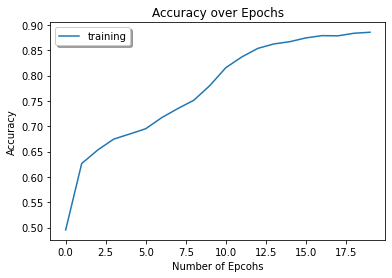

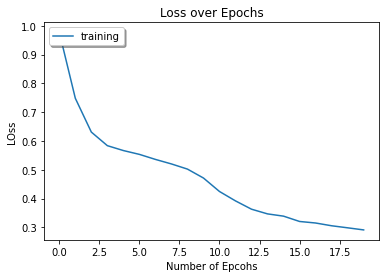

In [25]:

plt.plot(history.history['accuracy'], label = 'training')
plt.xlabel('Number of Epcohs')
plt.ylabel('Accuracy')
plt.legend(shadow = True, loc = "upper left")
plt.title("Accuracy over Epochs")
plt.show()

plt.plot(history.history['loss'], label = 'training')
plt.xlabel('Number of Epcohs')
plt.ylabel('Loss')
plt.legend(shadow = True, loc = "upper left")
plt.title("Loss over Epochs")
plt.show()
